In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error




In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Loading the data

In [3]:
data=pd.read_csv('D:/International Airline Passengers.csv')

In [4]:
data.head()

,Month,No_passengers_thousands
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# Data Preperation

In [5]:
# Checking the data types
data.dtypes

Month                      object
No_passengers_thousands     int64
dtype: object

In [6]:
# Deriving a new column with datetime format
data['year_month']=pd.to_datetime(data.Month)

In [7]:
data.head()

,Month,No_passengers_thousands,year_month
0,1949-01,112,1949-01-01
1,1949-02,118,1949-02-01
2,1949-03,132,1949-03-01
3,1949-04,129,1949-04-01
4,1949-05,121,1949-05-01


In [8]:
# Dropping the Month Col
data.drop(['Month'],axis=1,inplace=True)

In [9]:
# Rearranging the columns
data=data[['year_month','No_passengers_thousands']]

In [10]:
data.head()

,year_month,No_passengers_thousands
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [11]:
# Final datatypes
data.dtypes


year_month                 datetime64[ns]
No_passengers_thousands             int64
dtype: object

In [12]:
# Checking for missing values
data.isnull().sum()

year_month                 0
No_passengers_thousands    0
dtype: int64

In [13]:
# Ensuring data is sorted
data.sort_values('year_month', inplace=True, ascending=True)
data.head()

,year_month,No_passengers_thousands
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [14]:
# making the year_month as index
data.set_index('year_month',inplace=True)
data.head()

,No_passengers_thousands
year_month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Plotting time Series to see the trends

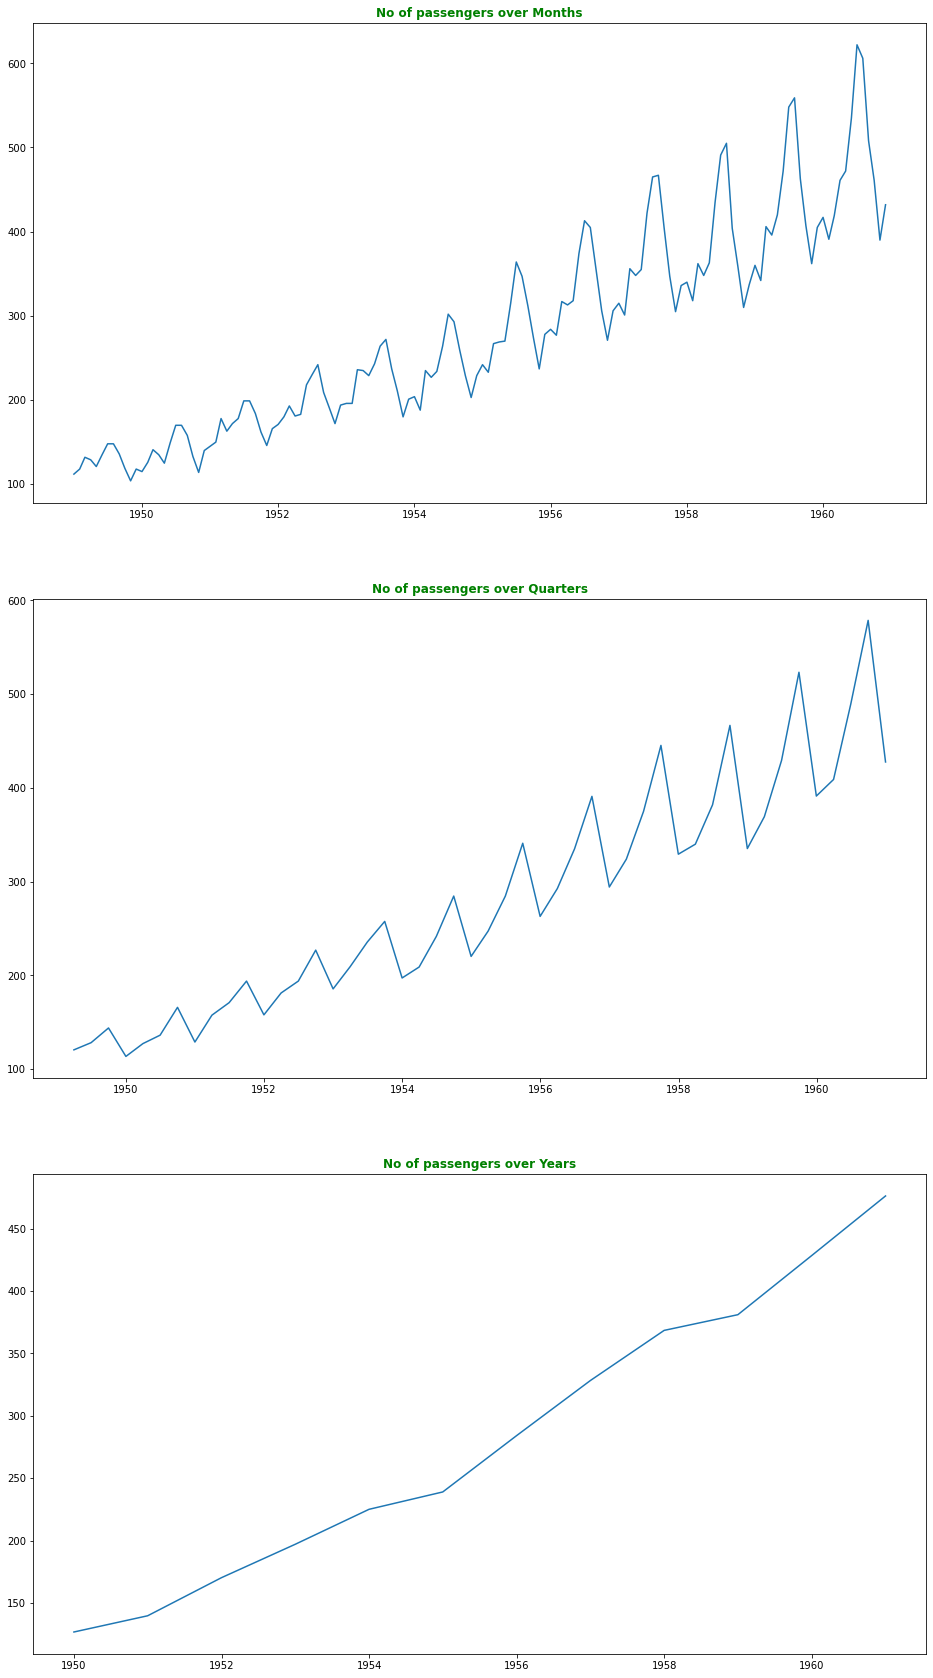

In [15]:
fig, ax = plt.subplots(3, figsize=(16,30))

# Monthly
ax[0].plot(data['No_passengers_thousands'])
ax[0].set_title('No of passengers over Months',fontweight="bold", color='g')

# Quarterly
ax[1].plot(data['No_passengers_thousands'].resample('Q').mean())
ax[1].set_title('No of passengers over Quarters',fontweight="bold", color='g')

# Yearly
ax[2].plot(data['No_passengers_thousands'].resample('Y').mean())
ax[2].set_title('No of passengers over Years',fontweight="bold", color='g')

plt.show()

# Time Series modelling using lstm

# Data preperation for modelling

In [16]:
vals=data['No_passengers_thousands'].values

In [17]:
vals

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432], dtype=int64)

In [18]:
vals=vals.reshape(-1,1)

In [19]:
vals

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

In [20]:
vals.shape

(144, 1)

In [21]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
vals = scaler.fit_transform(vals)

In [22]:
vals

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [23]:
# Split into training/test sets
train_size = int(len(vals) * 0.8)
train, test = vals[:train_size,], vals[train_size:,]

In [24]:
len(train)

115

In [25]:
len(test)

29

In [26]:
# Prepare the data in a format required for LSTM (samples, timesteps, features)

def Create_Dataset(df, lookback=1):
    X, Y = [], []
    for i in range(len(df) - lookback - 1):
        X.append(df[i:(i+lookback), 0])
        Y.append(df[i + lookback,0])
    return np.array(X), np.array(Y)

In [27]:
lookback = 3
X_train, Y_train = Create_Dataset(train, lookback)
X_test, Y_test   = Create_Dataset(test, lookback)

In [28]:
X_train.shape

(111, 3)

In [29]:
Y_train.shape

(111,)

In [30]:
# In order(samples,timesteps,features)
X_train = np.reshape(X_train, (X_train.shape[0], 1,X_train.shape[1]))

In [31]:
X_test  = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1] ))

In [32]:
# Print the data
print("X_train : \n")
print(X_train[:2])

print("\n\nY_train : \n")
print(Y_train[:2])

X_train : 

[[[0.01544402 0.02702703 0.05405405]]

 [[0.02702703 0.05405405 0.04826255]]]


Y_train : 

[0.04826255 0.03281853]


In [33]:
# Check the shapes of the data for modeling
print("X_train : ", X_train.shape)
print("Y_train : ", Y_train.shape)
print("\nX_test : ", X_test.shape)
print("Y_test : ", Y_test.shape)

X_train :  (111, 1, 3)
Y_train :  (111,)

X_test :  (25, 1, 3)
Y_test :  (25,)


# Building the Lstm Model

# Using Keras tuner for hypertuning

In [34]:
# Function for hypertuning
def build_knn(hp):
    models=Sequential([
    LSTM(units=hp.Int('units',min_value=4,max_value=100,step=1),
         input_shape=( X_train.shape[1], X_train.shape[2]
                      )),
    Dropout(0.25),
    Dense(1),
    ])
    models.compile(optimizer='adam', loss='mean_squared_error')
    return models

In [35]:
# Using 5 trials and val_acc as the criteria
tuner_search=RandomSearch(build_knn,objective='val_loss',max_trials=5,directory='cnn',project_name='lstm6')

INFO:tensorflow:Reloading Oracle from existing project cnn\lstm6\oracle.json
INFO:tensorflow:Reloading Tuner from cnn\lstm6\tuner0.json


In [36]:
tuner_search.search(X_train,Y_train,epochs=3,validation_split=0.1,verbose=2)

INFO:tensorflow:Oracle triggered exit


In [37]:
# Getting the best parameter model
model=tuner_search.get_best_models(num_models=1)[0]

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 80)                26880     
_________________________________________________________________
dropout (Dropout)            (None, 80)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 81        
Total params: 26,961
Trainable params: 26,961
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Training the model with 100 epochs
model.fit(X_train,Y_train,batch_size=1,epochs=100,validation_data=(X_test, Y_test),verbose=2,shuffle=False)

Train on 111 samples, validate on 25 samples
Epoch 1/100
111/111 - 8s - loss: 0.0057 - val_loss: 0.0183
Epoch 2/100
111/111 - 1s - loss: 0.0098 - val_loss: 0.0179
Epoch 3/100
111/111 - 1s - loss: 0.0074 - val_loss: 0.0203
Epoch 4/100
111/111 - 1s - loss: 0.0060 - val_loss: 0.0194
Epoch 5/100
111/111 - 1s - loss: 0.0056 - val_loss: 0.0168
Epoch 6/100
111/111 - 1s - loss: 0.0062 - val_loss: 0.0164
Epoch 7/100
111/111 - 1s - loss: 0.0050 - val_loss: 0.0162
Epoch 8/100
111/111 - 1s - loss: 0.0045 - val_loss: 0.0160
Epoch 9/100
111/111 - 1s - loss: 0.0044 - val_loss: 0.0146
Epoch 10/100
111/111 - 1s - loss: 0.0053 - val_loss: 0.0159
Epoch 11/100
111/111 - 1s - loss: 0.0046 - val_loss: 0.0134
Epoch 12/100
111/111 - 1s - loss: 0.0049 - val_loss: 0.0149
Epoch 13/100
111/111 - 1s - loss: 0.0041 - val_loss: 0.0124
Epoch 14/100
111/111 - 1s - loss: 0.0047 - val_loss: 0.0121
Epoch 15/100
111/111 - 1s - loss: 0.0041 - val_loss: 0.0113
Epoch 16/100
111/111 - 1s - loss: 0.0041 - val_loss: 0.0111
Epoc

# Make the predictions and covert back into original scale

In [40]:
# Make the predictions
train_predict = model.predict(X_train)
test_predict  = model.predict(X_test)

# Invert the predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])

test_predict  = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])


# Evaluation metrics

In [41]:
# MAE
print ("Train MAE : ", mean_squared_error(Y_train[0], train_predict[:,0]))
print ("Test MAE : ", mean_squared_error(Y_test[0], test_predict[:,0]))



Train MAE :  845.8537698294857
Test MAE :  1985.5919381671772


In [42]:
# RMSE
print ("Train RMSE : ", np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print ("Test RMSE : ", np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))


Train RMSE :  29.083565287452046
Test RMSE :  44.559981352859396


In [43]:
# MAPE
Mape_train =np.mean(np.abs(Y_train[0] - train_predict[:,0])/Y_train[0])
Mape_test =np.mean(np.abs(Y_test[0] - test_predict[:,0])/Y_test[0])

print ("\nTrain MAPE : ", Mape_train)
print ("Test MAPE : ", Mape_test)


Train MAPE :  0.10807149248417125
Test MAPE :  0.07967733702584684


# Plotting for train and test

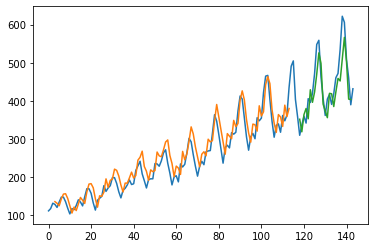

In [66]:
### Plotting 
# shift train predictions for plotting
look_back=3
trainPredictPlot = np.empty_like(vals)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(vals)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(vals)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(vals))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Predicting for next 12 months

In [67]:
y = []
for i in range(0,12):
    X1 = test[len(test)-3+i:,0]
    X1 = np.append(X1, y[-3:])
    X1 = X1.reshape(1,1,3)
    y1 = model.predict(X1)
    y.append(y1)
    print(scaler.inverse_transform(y1))

[[435.5694]]
[[427.40765]]
[[415.19345]]
[[405.374]]
[[400.10416]]
[[398.7297]]
[[399.58762]]
[[401.19235]]
[[402.63675]]
[[403.55646]]
[[403.94565]]
[[403.96683]]
